<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 5

## Q1: Distribution of power spectral estimates

<div style='background:#F0F0F0'>**1** You **may** use `matplotlib.mlab.psd` for the following question, but you had best use it correctly!

Using normally distributed random noise time series of length $N=2048$, show using a Monte Carlo analysis and by comparison to the theoretical probability distribution functions that:  
</div>

   1. The raw spectral estimate is indeed distributed as $\chi^2_2$.
   2. Show that block averaging with no overlap is distributed as $\chi^2_{2N_{blocks}}$.
   3. Show that block averaging with 50% overlap Hanning windows is distributed as $\chi^2_{2N_{blocks}}$.

<div style='background:#F0F0F0'>You can choose your block length, but making it an integer divisor of 2048 will make your life a lot easier.  Show that as $N_{blocks}$ is increased the variance drops (i.e. the distribution of the spectral estimates gets tighter).</div>


<div style='background:#F0F0F0'>HINT: for this time series the individual frequency estimates are indipendent samples of the distribution, so you can use them in compiling your distributions.</div>

<div style='background:#F0F0F0'>HINT: To get the pdf of the $\chi^2_\nu$ distribution correct, you need to "scale" by $\nu^{-1}$ where $\nu$ are the degrees of freedom.</div>

<div style='background:#F0F0F0'>HINT: for good presentation, make your histograms have the same bin sizes, and compare the distributions for all three cases on the same plot.</div>

In [2]:
import numpy.random as random
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib nbagg

/Users/jklymak/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
N = 2048*2
Nm =10000
Nfft=256/4
Nfft2=256/4

x = random.randn(N,Nm)

p = np.zeros((N/2+1,Nm))
p0 = np.zeros((N/2-1,Nm))
pblock = np.zeros((Nfft/2+1,Nm))
phan = np.zeros((Nfft/2+1,Nm))
phan2 = np.zeros((Nfft2/2+1,Nm))

for ind in range(Nm):
    pp,ff = mlab.psd(x[:,ind],NFFT=N,window=mlab.window_none,Fs=1.)
    p[:,ind]=np.squeeze(pp)
    pp,f = mlab.psd(x[:,ind],NFFT=Nfft,window=mlab.window_none,Fs=1.,noverlap=0)
    pblock[:,ind]=np.squeeze(pp)
    pp,f = mlab.psd(x[:,ind],NFFT=Nfft,window=mlab.window_hanning,
                    noverlap=Nfft/2,Fs=1.)
    phan[:,ind]=np.squeeze(pp)



<IPython.core.display.Javascript object>


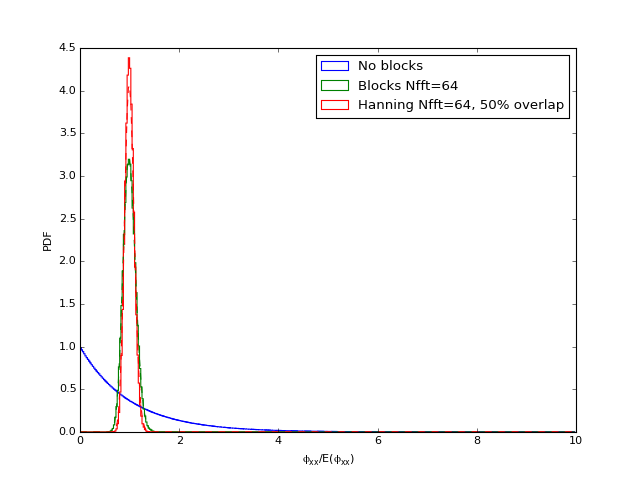

In [7]:
meanp=np.mean(p[2:-2,:].flatten())
fig,ax=plt.subplots(1,1)
bins = np.arange(0,10,0.025)
# so gxx/<gxx> will be distributed as chi^2_dof 
n,bins,ps=ax.hist(p[2:-2,:].flatten()/meanp,bins=bins,histtype='step',normed=True,label='No blocks');
ax.hist(pblock[2:-2,:].flatten()/meanp,histtype='step',normed=True,bins=bins,label='Blocks Nfft=%d'%Nfft);
ax.hist(phan[2:-2,:].flatten()/meanp,histtype='step',normed=True,bins=bins,label='Hanning Nfft=%d, 50%% overlap'%Nfft);
ax.legend()
#ax.set_xscale('log')
#ax.set_xlim([0,4])
pdf=stats.chi2.pdf(bins,df=2,scale=0.5)
ax.plot(bins,pdf,'b--')
df=N/Nfft*2
pdf=stats.chi2.pdf(bins,df=df,scale=1./df)
ax.plot(bins,pdf,'g--')
K = N/(Nfft/2.)-1
df = K*2.*(9./11.)
pdf=stats.chi2.pdf(bins,df=df,scale=1./df)
ax.plot(bins,pdf,'r--')

ax.set_xlabel('$\phi_{xx}/E(\phi_{xx})$')
ax.set_ylabel('PDF')


Indeed the distribution of the spectral estimates becomes tighter as NFFT is increased.

<div style='background:#F0F0F0'>**2**  For the Hanning window estimate, what fits better: $2N_{blocks}$ degrees of freedom or $18N_{blocks}/11$ degrees of freedom (the correct theoretical value)?  Its OK to evaluate by eye.</div>

<IPython.core.display.Javascript object>


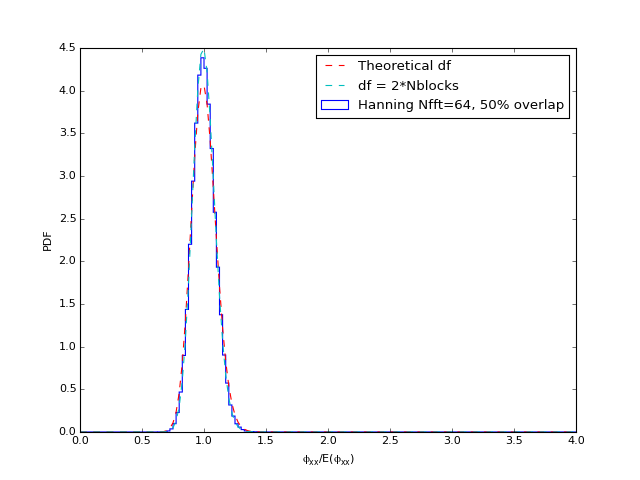

In [9]:
fig,ax=plt.subplots(1,1)
ax.hist(phan[2:-2,:].flatten()/meanp,histtype='step',normed=True,bins=bins,label='Hanning Nfft=%d, 50%% overlap'%Nfft);
ax.set_xlim([0,4])
K = N/(Nfft/2.)-1
df = K*2.*(9./11.)
pdf=stats.chi2.pdf(bins,df=df,scale=1./df)
ax.plot(bins,pdf,'r--',label='Theoretical df')
K = N/(Nfft/2.)-1
df = K*2.
pdf=stats.chi2.pdf(bins,df=df,scale=1./df)
ax.plot(bins,pdf,'c--',label='df = 2*Nblocks')
ax.set_xlabel('$\phi_{xx}/E(\phi_{xx})$'); ax.set_ylabel('PDF')
ax.legend()

The fit is a bit better with $df=2N_{blocks}$, which is surprising.  

## Q2: Spectra of a "red-noise" signal

<div style='background:#F0F0F0'> **1** Load in the Deep Cove hourly data, and compute the power spectra using some reasonable value for $N_{FFT}$, and comment on the effect of applying the Hanning window to not applying it to the spectral leakage.</div>

In [10]:
hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
dc=dc[np.isfinite(dc)]

<IPython.core.display.Javascript object>


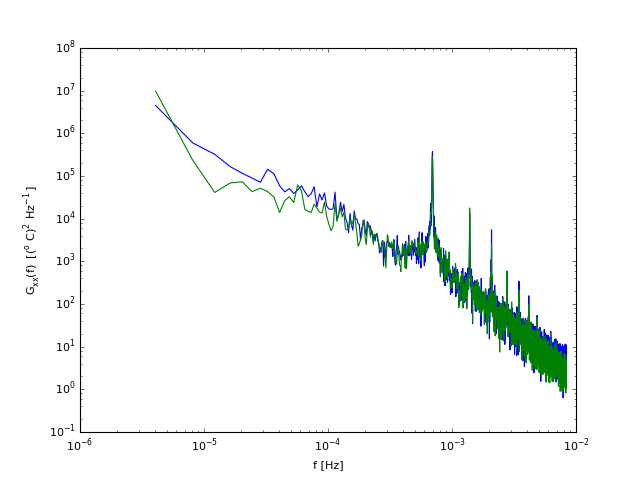

In [11]:
fig,ax=plt.subplots()
pp,f=mlab.psd(dc,NFFT=1024*4,window=mlab.window_none,Fs=1./60.)
ax.loglog(f,pp)
pp,f=mlab.psd(dc,NFFT=1024*4,window=mlab.window_hanning,Fs=1./60.)
ax.loglog(f,pp)

ax.set_xlabel('f [Hz]')
ax.set_ylabel(r'$G_{xx}(f)\ \ [(^oC)^2 Hz^{-1}]$')


<div style='background:#F0F0F0'> **2** Now do the same thing to the intergal of the Deep Cove data with time: $$y(t)=\int_o^t x(t')\ \mathrm{d}t'$$  This is obviously a silly thing to do, but compare the spectra and comment on the difference between the Hanning window and the non-Hanning windowed data.  </div>

<IPython.core.display.Javascript object>


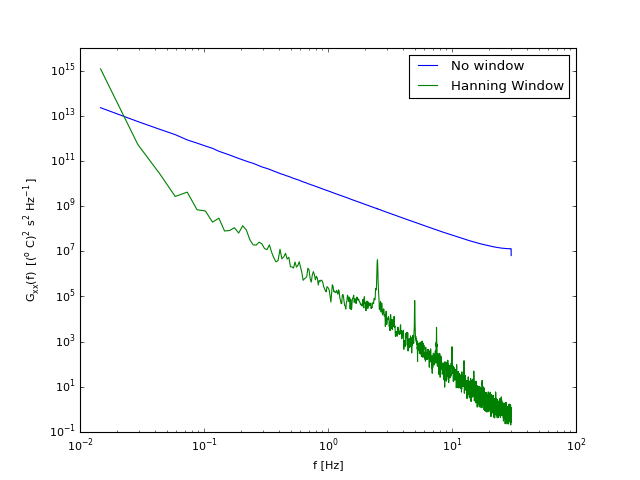

In [28]:
dcc = np.cumsum(dc[np.isfinite(dc)])*60.

fig,ax=plt.subplots()
pp,f=mlab.psd(dcc,NFFT=1024*4,window=mlab.window_none,Fs=60.)
ax.loglog(f,pp,label='No window')
pp,f=mlab.psd(dcc,NFFT=1024*4,window=mlab.window_hanning,Fs=60.)
ax.loglog(f,pp,label='Hanning Window')
ax.set_xlabel('f [Hz]')
ax.set_ylabel(r'$G_{xx}(f)\ \ [(^oC)^2 s^2 Hz^{-1}]$')
ax.legend()


For this steeper spectrum, the leakage matters a lot, because the low frequencies "leak" into the high frequencies, and swamp the signal.  This didn't happen for the raw signal, because it was not "steep" enough.
